In [1]:
import random

In [2]:
"""adj* => adj* adj | adj null"""

def adj(): 
    return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]

In [3]:
def adj_star(): 
    return random.choice([lambda:'',lambda: adj() + adj_star()])()

In [4]:
adj_star()

'好看的'

In [5]:
def adj_star_2():         #无限循环，报错RecursionError
    return random.choice(['',adj() + adj_star_2()])

In [6]:
coordination_source = """
{name:'兰州', geoCoord:[103.73, 36.03]},
{name:'嘉峪关', geoCoord:[98.17, 39.47]},
{name:'西宁', geoCoord:[101.74, 36.56]},
{name:'成都', geoCoord:[104.06, 30.67]},
{name:'石家庄', geoCoord:[114.48, 38.03]},
{name:'拉萨', geoCoord:[102.73, 25.04]},
{name:'贵阳', geoCoord:[106.71, 26.57]},
{name:'武汉', geoCoord:[114.31, 30.52]},
{name:'郑州', geoCoord:[113.65, 34.76]},
{name:'济南', geoCoord:[117, 36.65]},
{name:'南京', geoCoord:[118.78, 32.04]},
{name:'合肥', geoCoord:[117.27, 31.86]},
{name:'杭州', geoCoord:[120.19, 30.26]},
{name:'南昌', geoCoord:[115.89, 28.68]},
{name:'福州', geoCoord:[119.3, 26.08]},
{name:'广州', geoCoord:[113.23, 23.16]},
{name:'长沙', geoCoord:[113, 28.21]},
//{name:'海口', geoCoord:[110.35, 20.02]},
{name:'沈阳', geoCoord:[123.38, 41.8]},
{name:'长春', geoCoord:[125.35, 43.88]},
{name:'哈尔滨', geoCoord:[126.63, 45.75]},
{name:'太原', geoCoord:[112.53, 37.87]},
{name:'西安', geoCoord:[108.95, 34.27]},
//{name:'台湾', geoCoord:[121.30, 25.03]},
{name:'北京', geoCoord:[116.46, 39.92]},
{name:'上海', geoCoord:[121.48, 31.22]},
{name:'重庆', geoCoord:[106.54, 29.59]},
{name:'天津', geoCoord:[117.2, 39.13]},
{name:'呼和浩特', geoCoord:[111.65, 40.82]},
{name:'南宁', geoCoord:[108.33, 22.84]},
//{name:'西藏', geoCoord:[91.11, 29.97]},
{name:'银川', geoCoord:[106.27, 38.47]},
{name:'乌鲁木齐', geoCoord:[87.68, 43.77]},
{name:'香港', geoCoord:[114.17, 22.28]},
{name:'澳门', geoCoord:[113.54, 22.19]}
"""

In [7]:
city_location = {}

In [8]:
test_string = "{name:'兰州', geoCoord:[103.73, 36.03]}"

In [9]:
import re
pattern = re.compile(r"name:'(\w+)',\s+geoCoord:\[(\d+.\d+),\s(\d+.\d+)\]")
re.findall(pattern,test_string)

[('兰州', '103.73', '36.03')]

In [10]:
for line in coordination_source.split('\n'):
    city_info = re.findall(pattern,line)
    
    if not city_info: continue
        
    city, long, lat = city_info[0]
    
    long, lat = float(long),float(lat)
    
    city_location[city] = (long,lat)

In [11]:
city_location

{'上海': (121.48, 31.22),
 '乌鲁木齐': (87.68, 43.77),
 '兰州': (103.73, 36.03),
 '北京': (116.46, 39.92),
 '南京': (118.78, 32.04),
 '南宁': (108.33, 22.84),
 '南昌': (115.89, 28.68),
 '台湾': (121.3, 25.03),
 '合肥': (117.27, 31.86),
 '呼和浩特': (111.65, 40.82),
 '哈尔滨': (126.63, 45.75),
 '嘉峪关': (98.17, 39.47),
 '天津': (117.2, 39.13),
 '太原': (112.53, 37.87),
 '广州': (113.23, 23.16),
 '成都': (104.06, 30.67),
 '拉萨': (102.73, 25.04),
 '杭州': (120.19, 30.26),
 '武汉': (114.31, 30.52),
 '沈阳': (123.38, 41.8),
 '济南': (117.0, 36.65),
 '海口': (110.35, 20.02),
 '澳门': (113.54, 22.19),
 '石家庄': (114.48, 38.03),
 '福州': (119.3, 26.08),
 '西宁': (101.74, 36.56),
 '西安': (108.95, 34.27),
 '西藏': (91.11, 29.97),
 '贵阳': (106.71, 26.57),
 '郑州': (113.65, 34.76),
 '重庆': (106.54, 29.59),
 '银川': (106.27, 38.47),
 '长春': (125.35, 43.88),
 '长沙': (113.0, 28.21),
 '香港': (114.17, 22.28)}

In [12]:
import math

def geo_distance(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [13]:
def get_geo_distance(city1,city2):
    return geo_distance(city_location[city1],city_location[city2])

In [14]:
get_geo_distance('北京','长沙')

665.2271362574077

In [15]:
import networkx as nx

In [16]:
city_graph = nx.Graph()
city_graph.add_nodes_from(list(city_location.keys()))

In [17]:
%matplotlib inline

In [18]:
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']  

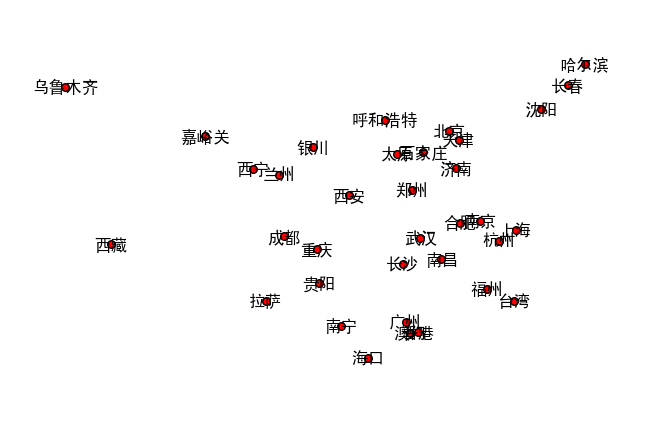

In [19]:
import matplotlib.pyplot as plt
nx.draw(city_graph,city_location,with_labels=True,node_size=30)

In [20]:
import matplotlib
print(matplotlib.__path__)

['C:\\Program Files\\Anaconda3\\lib\\site-packages\\matplotlib']


In [21]:
from collections import defaultdict
threshold = 300
city_connection = defaultdict(list)

In [22]:
city_connection

defaultdict(list, {})

In [23]:
for c1 in city_location:
    for c2 in city_location:
        if c1 == c2 : continue
        
        distance = get_geo_distance(c1,c2)
        
        if distance < threshold :
            city_connection[c1].append(c2)
            city_connection[c2].append(c1)

In [24]:
city_connection

defaultdict(list,
            {'上海': ['杭州', '杭州'],
             '兰州': ['银川', '成都', '银川', '成都', '西宁', '西宁'],
             '北京': ['济南', '石家庄', '天津', '济南', '石家庄', '天津'],
             '南京': ['杭州', '杭州', '合肥', '合肥'],
             '南宁': ['海口', '贵阳', '海口', '贵阳'],
             '南昌': ['武汉', '武汉', '合肥', '合肥'],
             '台湾': ['福州', '福州'],
             '合肥': ['南京', '南昌', '南京', '南昌', '济南', '济南'],
             '呼和浩特': ['太原', '太原'],
             '哈尔滨': ['长春', '长春'],
             '天津': ['北京', '济南', '北京', '济南'],
             '太原': ['呼和浩特', '郑州', '石家庄', '呼和浩特', '郑州', '石家庄'],
             '广州': ['长沙', '长沙', '澳门', '香港', '澳门', '香港'],
             '成都': ['拉萨', '重庆', '拉萨', '重庆', '兰州', '西宁', '兰州', '西宁'],
             '拉萨': ['成都', '西宁', '成都', '西宁'],
             '杭州': ['福州', '南京', '上海', '福州', '南京', '上海'],
             '武汉': ['长沙', '长沙', '南昌', '郑州', '南昌', '郑州'],
             '沈阳': ['长春', '长春'],
             '济南': ['合肥', '北京', '合肥', '北京', '石家庄', '天津', '石家庄', '天津'],
             '海口': ['南宁', '南宁'],
         

In [25]:
%matplotlib inline
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei'] 

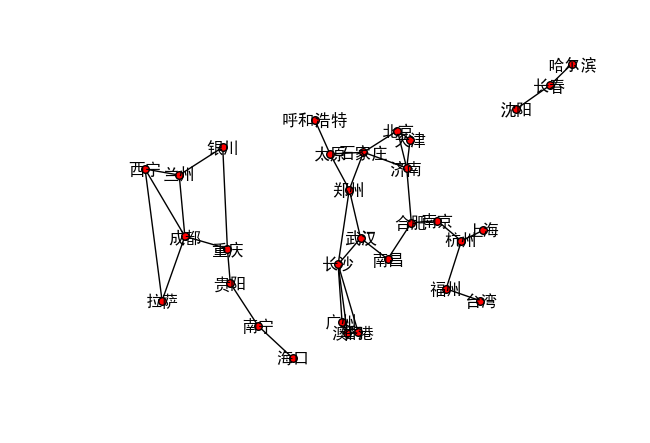

In [26]:
city_with_road = nx.Graph(city_connection)
nx.draw(city_with_road,city_location,with_labels=True,node_size=30)

In [27]:
from collections import defaultdict
simple_connection_info_src = {
    '北京': ['太原', '沈阳'],
    '太原': ['北京', '西安', '郑州'],
    '兰州': ['西安'],
    '郑州': ['太原'],
    '西安': ['兰州', '长沙'],
    '长沙': ['福州', '南宁'],
    '沈阳': ['北京']
}

In [28]:
simple_connection_info = defaultdict(list)

In [29]:
simple_connection_info.update(simple_connection_info_src)

In [30]:
simple_connection_info

defaultdict(list,
            {'兰州': ['西安'],
             '北京': ['太原', '沈阳'],
             '太原': ['北京', '西安', '郑州'],
             '沈阳': ['北京'],
             '西安': ['兰州', '长沙'],
             '郑州': ['太原'],
             '长沙': ['福州', '南宁']})

In [56]:
def bfs(graph, start):
    
    visited=[start]
    
    seen = set()
    
    while visited:
        froninter = visited.pop()
        
        if froninter in seen:continue
        
        for successor in graph[froninter]:
            if successor in seen:continue
            
            print(successor)
            visited = [successor] + visited
#             visited = visited + [successor]
        seen.add(froninter)
    return seen

In [51]:
number_grpah = defaultdict(list)

In [52]:
number_grpah.update({
        1:[2,3],
        2:[1,4],
        3:[1,5],
        4:[2,6],
        5:[3,7],
        7:[5,8]
    })

In [53]:
number_grpah

defaultdict(list,
            {1: [2, 3], 2: [1, 4], 3: [1, 5], 4: [2, 6], 5: [3, 7], 7: [5, 8]})

In [45]:
bfs(number_grpah,1)

2
3
4
5
6
7
8


{1, 2, 3, 4, 5, 6, 7, 8}

In [54]:
bfs(number_grpah,1)

2
3
5
7
8
4
6


{1, 2, 3, 4, 5, 6, 7, 8}

In [46]:
simple_connection_info['西安']

['兰州', '长沙']

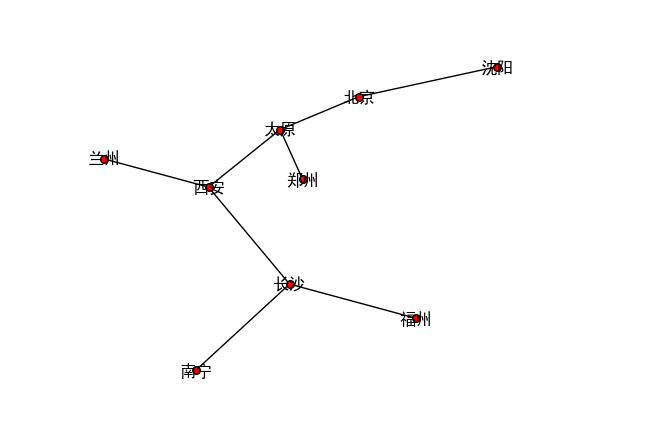

In [47]:
nx.draw(nx.Graph(simple_connection_info),city_location,with_labels=True,node_size=30)

In [57]:
bfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [55]:
bfs(simple_connection_info,'北京')

太原
沈阳
西安
郑州
兰州
长沙
福州
南宁


{'兰州', '北京', '南宁', '太原', '沈阳', '福州', '西安', '郑州', '长沙'}

In [71]:
def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]
    
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
        
        successors = connection_grpah[froninter]
        
        for city in successors:
            if city in visited: continue
            
            new_path = path + [city]
            pathes.append(new_path)
            
            if city == destination: return new_path
        visited.add(froninter)
        pathes = sort_candidate(pathes)

In [72]:
def transfer_stations_first(pathes): 
    return sorted(pathes, key=len)

In [77]:
def transfer_as_much_possible(pathes):
    return sorted(pathes,key=len,reverse=True)

In [83]:
def shortest_path_first(pathes):
    if len(pathes) <= 1 : return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
            distance += get_geo_distance(station,path[-1])
        
        return distance
    return sorted(pathes,key=get_path_distnace)

In [78]:
search('沈阳','南宁',simple_connection_info,sort_candidate=transfer_stations_first)

['沈阳', '北京', '太原', '西安', '长沙', '南宁']

In [79]:
search('沈阳','南宁',simple_connection_info,sort_candidate=transfer_as_much_possible)

['沈阳', '北京', '太原', '西安', '长沙', '南宁']

In [80]:
search('北京','台湾',city_connection,sort_candidate=transfer_as_much_possible)

['北京', '济南', '合肥', '南京', '杭州', '福州', '台湾']

In [82]:
search('北京','台湾',city_connection,sort_candidate=transfer_stations_first)

['北京', '济南', '合肥', '南京', '杭州', '福州', '台湾']

In [84]:
search('北京','台湾',city_connection,sort_candidate=shortest_path_first)

['北京', '济南', '合肥', '南京', '杭州', '福州', '台湾']

In [87]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [88]:
pretty_print(search('北京','台湾',city_connection,sort_candidate=shortest_path_first))

北京🚗->济南🚗->合肥🚗->南京🚗->杭州🚗->福州🚗->台湾


In [8]:
import requests
import re

In [9]:
url = "https://movie.douban.com/subject/26931786/?from=showing"

In [10]:
response = requests.get(url)

In [17]:
# what_we_want =  r'<a href="https://(movie\.douban\.com/subject/\d+/\?from=subject-page)" class="" '
# <a href="https://movie.douban.com/subject/26100958/?from=subject-page" class="" >

In [19]:
pattern = re.compile(what_we_want)

In [20]:
likes = pattern.findall(response.text)

In [21]:
for like in likes:
    print(like)

movie.douban.com/subject/24753477/?from=subject-page
movie.douban.com/subject/26100958/?from=subject-page
movie.douban.com/subject/25820460/?from=subject-page
movie.douban.com/subject/1432146/?from=subject-page
movie.douban.com/subject/25937854/?from=subject-page
movie.douban.com/subject/1866473/?from=subject-page
movie.douban.com/subject/25821634/?from=subject-page
movie.douban.com/subject/26213252/?from=subject-page
movie.douban.com/subject/25828589/?from=subject-page
movie.douban.com/subject/4920389/?from=subject-page


In [1]:
# <a href="https://movie.douban.com/subject/26100958/?from=subject-page" class="" >

In [2]:
from sklearn.datasets import load_boston

In [3]:
data = load_boston()

In [4]:
X, y = data['data'], data['target']

In [5]:
X[1]

array([  2.73100000e-02,   0.00000000e+00,   7.07000000e+00,
         0.00000000e+00,   4.69000000e-01,   6.42100000e+00,
         7.89000000e+01,   4.96710000e+00,   2.00000000e+00,
         2.42000000e+02,   1.78000000e+01,   3.96900000e+02,
         9.14000000e+00])

In [6]:
y[1]

21.600000000000001

In [7]:
X.shape

(506, 13)

In [8]:
len(X[:,5])

506

In [9]:
len(y)

506

In [10]:
%matplotlib inline

In [11]:
import matplotlib.pyplot as plt

In [12]:
def draw_rm_and_price():
    plt.scatter(X[:,5],y)

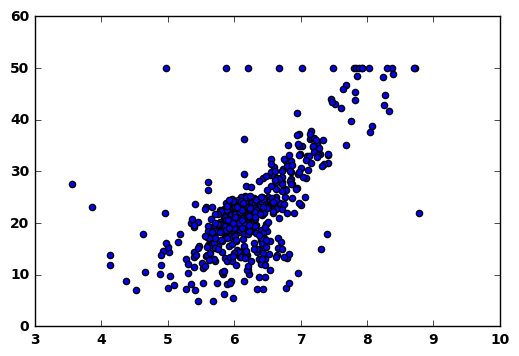

In [13]:
draw_rm_and_price()

In [14]:
import random

In [15]:
def price(rm, k, b):
    return k * rm  + b

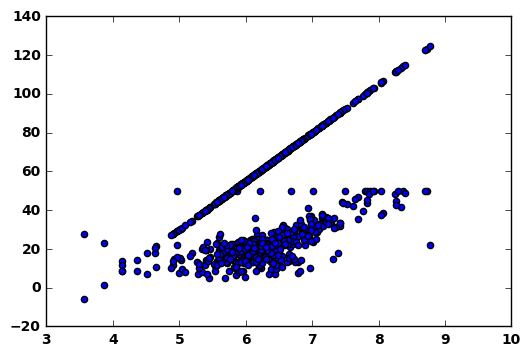

In [16]:
X_rm = X[:,5]
k = random.randint(-100,100)
b = random.randint(-100,100)
price_by_random_k_and_b = [price(rm,k,b) for rm in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

## loss

$$ loss = \frac{1}{n} \sum{(y_i - \hat{y_i})}$$

In [17]:
X_rm = X[:,5]

In [18]:
def loss(y, y_hat):
    return sum((y_i-y_hat_i)**2 for y_i,y_hat_i in zip(y,y_hat)) / len(y)

In [73]:
def loss_2(y,y_hat):
    return sum(abs(y_i-y_hat_i) for y_i,y_hat_i in zip(y,y_hat))

In [75]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.randint(-100,100)
    b = random.randint(-100,100)
    
    price_by_random_k_and_b = [price(rm,k,b) for rm in X_rm]
    
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        best_k = k
        best_b = b
        min_loss = current_loss
        
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 54 best_b: 62, and the loss is: 144554.59969852166
When time is : 3, get best_k: -28 best_b: -80, and the loss is: 78285.5093107667
When time is : 4, get best_k: 35 best_b: -13, and the loss is: 34388.25417109683
When time is : 9, get best_k: 14 best_b: -66, and the loss is: 55.720204766798396
When time is : 989, get best_k: 8 best_b: -29, and the loss is: 45.77586207114628


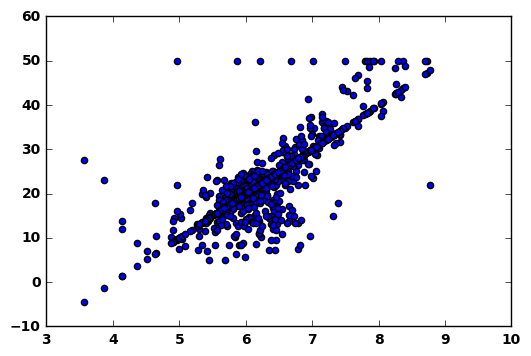

In [20]:
X_rm = X[:,5]
k = 10
b = -40
price_by_random_k_and_b = [price(rm,k,b) for rm in X_rm]
draw_rm_and_price()
plt.scatter(X_rm,price_by_random_k_and_b)

In [85]:
X_rm = X[:,5]
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1,-1),
    (+1,+1),
    (-1,-1),
    (-1,+1)
]

# scalar = 0.1
scalar = 0.2
next_direction = random.choice(direction)
# print(type(next_direction))
for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k = best_k + k_direction * scalar
    current_b = best_b + b_direction * scalar
    
    price_by_random_k_and_b = [price(rm,best_k,best_b) for rm in X_rm]
    current_loss = loss(y,price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k = current_k
        best_b = current_b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else: 
        next_direction = random.choice(direction)
    


When time is : 0, get best_k: 67.41711098153864 best_b: 93.3503896469057, and the loss is: 247713.26572754091
When time is : 1, get best_k: 67.21711098153864 best_b: 93.1503896469057, and the loss is: 246258.7024775354
When time is : 2, get best_k: 67.01711098153864 best_b: 92.95038964690569, and the loss is: 244808.42391500005
When time is : 3, get best_k: 66.81711098153863 best_b: 92.75038964690569, and the loss is: 243362.4300399343
When time is : 4, get best_k: 66.61711098153863 best_b: 92.55038964690569, and the loss is: 241920.72085233842
When time is : 5, get best_k: 66.41711098153863 best_b: 92.35038964690568, and the loss is: 240483.29635221255
When time is : 6, get best_k: 66.21711098153862 best_b: 92.15038964690568, and the loss is: 239050.15653955648
When time is : 7, get best_k: 66.01711098153862 best_b: 91.95038964690568, and the loss is: 237621.3014143705
When time is : 8, get best_k: 65.81711098153862 best_b: 91.75038964690567, and the loss is: 236196.73097665413
When t

In [30]:
direction = [
    (+1,-1),
    (+1,+1),
    (-1,-1),
    (-1,+1)
]
print(type(direction))

<class 'list'>


In [47]:
next_direction = random.choice(direction)
direction.remove(next_direction)

In [48]:
direction

[]